In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler,OneHotEncoder


In [237]:
train=pd.read_csv('train.csv',index_col=0)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [238]:
test=pd.read_csv('test.csv',index_col=0)


In [239]:
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


In [240]:
train['Exterior1st'].isnull().sum()

0

In [241]:
train['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [242]:
print(train.columns)
print(test.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [243]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [244]:
train['MSZoning'].dtype=='object'

True

In [245]:
train['LotFrontage'].isnull().any()

True

In [246]:
null_col=[i for i in train.columns if train[i].isnull().any()==True]
null_col

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [247]:
len(null_col)

19

In [248]:
cat_col=[i for i in train.columns if train[i].dtype=='object']
cat_col.sort()

In [249]:
len(cat_col)

43

In [250]:
# filling NAN values

train['Alley'].fillna('Data not given',inplace=True)
train['MasVnrType'].fillna('Data not given',inplace=True)
for col in null_col:
    if col in cat_col:
        train[col].fillna(train[col].mode()[0], inplace=True)
    else:
        train[col].fillna(train[col].mean(), inplace=True)


In [251]:
check_null=[i for i in train.columns if train[i].isnull().any()==True]
(check_null)

[]

In [252]:
train['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [253]:
print(len(cat_col))
cat_col.remove('CentralAir')
print(len(cat_col))


43
42


In [254]:
print(len(cat_col))


42


In [255]:
dummy_train=pd.get_dummies(train[cat_col])
encoder=LabelEncoder()
x=encoder.fit_transform(train['CentralAir'])

In [256]:
print(len(cat_col))

42


In [257]:
cat_col.append('CentralAir')
print(len(cat_col))

43


In [258]:
train.drop(columns=cat_col,inplace=True)

In [259]:
train=pd.merge(train,dummy_train,left_index=True,right_index=True)
train['CentralAir']=x
train.head()
print(train.shape)

(1460, 290)


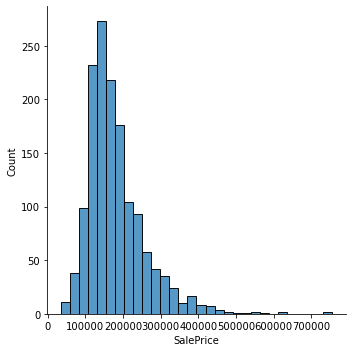

In [260]:
sns.displot(train['SalePrice'],bins=30)

In [285]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [262]:
scalar=StandardScaler()
x1=train.drop('SalePrice',axis=1)

# sorting according to columns
x1.sort_index(axis=1,inplace=True)

x=scalar.fit_transform(x1)
y=train['SalePrice']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)

In [263]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [264]:
y_pred=model.predict(x_test)
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2: ', r2_score(y_test,y_pred))

RMSE:  3.04260142727565e+17
R2:  -1.426412023577945e+25


In [286]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2: ', r2_score(y_test,y_pred))

RMSE:  34557.227974737
R2:  0.8159937147727531


In [265]:
# compare true and predicted values 
for i,j in zip(y_test,y_pred):
    print(i,j)

212000 210942.0
193000 161534.0
274970 263428.0
107000 97118.0
135000 144190.0
185500 190206.0
194700 197054.0
141000 127230.0
277500 314430.0
223000 238302.0
149000 132030.0
159500 133630.0
260000 258270.0
91000 79102.0
145000 144734.0
212000 233086.0
148000 149630.0
167000 161662.0
217000 213966.0
164000 219902.0
190000 189630.0
274300 249598.0
158500 152062.0
182000 230142.0
244600 221950.0
119000 110238.0
313000 311422.0
245350 230366.0
262500 272766.0
240000 257406.0
278000 274014.0
181000 203230.0
132500 137598.0
137000 135678.0
137500 123134.0
232000 240510.0
172785 188030.0
233170 242942.0
122000 114238.0
89000 80254.0
214000 207326.0
151000 133054.0
124500 138302.0
277000 250366.0
134000 128894.0
268000 272894.0
198500 189702.0
117500 126462.0
155000 157694.0
114500 114686.0
625000 472958.0
173000 190142.0
174000 192286.0
90350 116542.0
213250 209342.0
115000 108286.0
165000 177182.0
255500 291326.0
319000 -1.643579292631374e+18
147500 147326.0
128500 124286.0
244000 290686.0


In [266]:
# preprocessing test data

In [267]:
null_col=[i for i in test.columns if test[i].isnull().any()==True]
print(len(null_col))
cat_col=[i for i in test.columns if test[i].dtype=='object']
cat_col.sort()
print(len(cat_col))


33
43


In [268]:

test['Alley'].fillna('Data not given',inplace=True)
test['MasVnrType'].fillna('Data not given',inplace=True)
for col in null_col:
    if col in cat_col:
        test[col].fillna(test[col].mode()[0], inplace=True)
    else:
        test[col].fillna(test[col].mean(), inplace=True)


In [269]:

check_null=[i for i in test.columns if test[i].isnull().any()==True]
(check_null)


[]

In [270]:
test['CentralAir'].value_counts()


Y    1358
N     101
Name: CentralAir, dtype: int64

In [271]:
print(len(cat_col))
cat_col.remove('CentralAir')
print(len(cat_col))


43
42


In [272]:
dummy_test=pd.get_dummies(test[cat_col])
encoder=LabelEncoder()
cA=encoder.fit_transform(test['CentralAir'])

In [273]:
# checking shape of train and test data
print(dummy_test.shape)
print(dummy_train.shape)

(1459, 234)
(1460, 252)


In [274]:
# adding missing encoded colums in dummy test data 

for col in dummy_train.columns:
    if col not in dummy_test.columns and col!='CentralAir':
        test[col]=[0 for i in range(test.shape[0])]
        

In [275]:
cat_col.append('CentralAir')


In [276]:
print(len(cat_col))
test.drop(columns=cat_col,inplace=True)
test=pd.merge(test,dummy_test,left_index=True,right_index=True)


43


In [277]:
test['CentralAir']=cA
test.sort_index(axis=1,inplace=True)
test.head()


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Data not given,Alley_Grvl,Alley_Pave,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1461,896,0,0,1,0,0,2,1,0,0,...,0,1,5,882.0,1,0,140,1961,1961,2010
1462,1329,0,0,1,0,0,3,1,0,0,...,0,1,6,1329.0,1,0,393,1958,1958,2010
1463,928,701,0,1,0,0,3,1,0,0,...,0,1,6,928.0,1,0,212,1997,1998,2010
1464,926,678,0,1,0,0,3,1,0,0,...,0,1,7,926.0,1,0,360,1998,1998,2010
1465,1280,0,0,1,0,0,2,0,0,0,...,0,1,5,1280.0,1,0,0,1992,1992,2010


In [278]:
print(test.shape)

(1459, 289)


In [279]:
#check features of test an train
((x1.columns)==(test.columns)).all()

True

In [280]:
# scaling test data
test1=scalar.fit_transform(test)

In [287]:
model1=DecisionTreeRegressor()
model1.fit(x_train,y_train)


DecisionTreeRegressor()

In [288]:
y_pred=model1.predict(test1)

In [289]:
submission=pd.DataFrame()
submission['id']=test.index
submission['target']=y_pred
submission.head()

,id,target
0,1461,114500.0
1,1462,155000.0
2,1463,190000.0
3,1464,200500.0
4,1465,192000.0
